# Initial Setups

## autoreload

In [1]:
%load_ext autoreload
%autoreload 2

## dir setup

In [2]:
from dotenv import load_dotenv, find_dotenv
import os

this_file_path = os.path.dirname(os.path.abspath("__file__"))
# if script (not notebook)...
# project_dir = os.path.join(os.path.dirname(__file__), os.pardir)

# project directory
project_dir = os.path.join(this_file_path, os.pardir)

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

In [3]:
raw_data_dir = os.path.join(project_dir, os.environ.get("RAW_DATA_DIR"))
processed_data_dir = os.path.join(project_dir, os.environ.get("PROCESSED_DATA_DIR"))
interim_data_dir = os.path.join(project_dir, os.environ.get("INTERIM_DATA_DIR"))
wordvecs_data_dir = os.path.join(project_dir, os.environ.get("WORDVECS_DATA_DIR"))
figures_dir = os.path.join(project_dir, os.environ.get("FIGURES_DIR"))
reports_dir = os.path.join(project_dir, os.environ.get("REPORTS_DIR"))
cv_dir = os.path.join(project_dir, os.environ.get("CV_DIR"))
models_dir = os.path.join(project_dir, os.environ.get("MODELS_DIR"))

## imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
# import sweetviz as sv
# import utils

In [5]:
pd.set_option('max_rows', 200)
pd.set_option('max_columns', None)

In [6]:
from tqdm import tqdm
tqdm.pandas()

/Users/hitoshinagano/.virtualenvs/tensorflow2/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## project imports

In [7]:
import sys
sys.path.insert(0, '..')

from src.features import *
from src.models import *

### reading item_domain

In [8]:
item_domain_fn = 'item_domain.pkl'
item_domain_fp = os.path.join(processed_data_dir, item_domain_fn)
item_domain = pd.read_pickle(item_domain_fp)

In [9]:
item_domain

,item_id,domain_id
0,111260,MLM-INDIVIDUAL_HOUSES_FOR_SALE
1,871377,MLM-VIDEO_GAMES
2,490232,MLM-SKIRTS
3,1150706,MLM-GRAPHICS_CARDS
4,934912,MLM-NOTEBOOKS
...,...,...
2102272,1099649,MLB-BABY_STROLLERS
2102273,1482187,MLB-KITCHEN_SUPPLIES
2102274,1118904,MLB-SOCKS
2102275,237229,MLB-DISPOSABLE_BABY_DIAPERS


## test_dataset.jl.gz

In [10]:
%%time
test = read_raw_save_processed('test_dataset.jl.gz', 'test_dataset.pkl')

CPU times: user 1.17 s, sys: 418 ms, total: 1.59 s
Wall time: 1.64 s


### submissions check

In [11]:
pred_10_fn = 'pred_11_interim.pkl'
pred_10_fp = os.path.join(interim_data_dir, pred_10_fn)
pred_10 = pd.read_pickle(pred_10_fp)

pred_10.columns = [str(c) for c in pred_10.columns]

In [12]:
for c in range(10):
    pred_10[str(c) + '_domain'] = pd.merge(pred_10, item_domain, how = 'left', left_on = str(c), right_on = 'item_id')['domain_id']
    pred_10[str(c) + '_MLX'] = pred_10[str(c) + '_domain'].str[:3]

In [13]:
pred_10_domains = pred_10.filter(like = 'MLX').replace({'MLB': 1, 'MLM': 0})

In [14]:
pred_10 = pd.concat([pred_10, pred_10_domains.sum(axis = 1)], axis = 1)

In [15]:
pred_10[pred_10[0].isin(range(1, 10))].sample(10)

,0,1,2,3,4,5,6,7,8,9,top_score,origin,0_domain,0_MLX,1_domain,1_MLX,2_domain,2_MLX,3_domain,3_MLX,4_domain,4_MLX,5_domain,5_MLX,6_domain,6_MLX,7_domain,7_MLX,8_domain,8_MLX,9_domain,9_MLX,0
159989,1746238.0,212907.0,593367.0,912373.0,1354950.0,931473.0,704958.0,1451400.0,1951048.0,57664.0,0.005075,pt,MLB-NON_RETURN_DRAIN_VALVES,MLB,MLB-DOLLS,MLB,MLB-HEADPHONES,MLB,MLB-INSTANT_COFFEE,MLB,MLB-INSTANT_COFFEE,MLB,MLM-SPEAKERS,MLM,MLB-HARD_DRIVES_AND_SSDS,MLB,MLB-HARD_DRIVE_AND_SSD_ENCLOSURES,MLB,MLB-SNEAKERS,MLB,MLB-SUBMERSIBLE_PUMPS,MLB,9.0
32722,1819874.0,826105.0,839656.0,1143099.0,106472.0,84158.0,1089577.0,1744905.0,898862.0,2042115.0,0.498149,pt,MLB-BOOKS,MLB,MLB-UNCLASSIFIED_PRODUCTS,MLB,MLB-BOOKS,MLB,None,None,MLB-ROUTERS,MLB,MLB-FOODS_AND_DRINKS,MLB,MLB-BOOKS_MAGAZINES_AND_COMICS,MLB,MLB-BOOKS_MAGAZINES_AND_COMICS,MLB,MLB-HARD_DRIVES_AND_SSDS,MLB,MLB-PARTY_SUPPLIES,MLB,9.0
59636,1085873.0,436627.0,1277681.0,1393110.0,691925.0,1350947.0,218493.0,1411362.0,709138.0,465880.0,0.002136,pt,MLB-WEBCAMS,MLB,MLB-CELLPHONES,MLB,MLM-CELLPHONE_COVERS,MLM,MLB-WRISTWATCHES,MLB,MLB-AIR_CONDITIONER_REMOTE_CONTROLS,MLB,MLB-TOOTHPASTES,MLB,MLB-HOME_APPLIANCES_ACCESSORIES_AND_SPARE_PARTS,MLB,MLB-OPERATING_SYSTEMS,MLB,MLB-HAIRDRESSING_ACCESSORIES,MLB,MLB-HAIR_STRAIGHTENERS,MLB,9.0
55710,931029.0,1590749.0,1411362.0,1993832.0,1737819.0,1378010.0,2071202.0,218493.0,1453777.0,1193887.0,0.001291,pt,MLB-OFFICE_SOFTWARE,MLB,MLB-ELECTRONIC_PRODUCTS,MLB,MLB-OPERATING_SYSTEMS,MLB,MLB-OPERATING_SYSTEMS,MLB,MLB-AIR_CONDITIONER_CONTROL_BOARDS,MLB,MLM-ELECTRICAL_CABLES,MLM,MLB-BEARD_OILS_AND_BALMS,MLB,MLB-HOME_APPLIANCES_ACCESSORIES_AND_SPARE_PARTS,MLB,MLB-SNEAKERS,MLB,MLB-SPORT_AND_BAZAAR_BOTTLES,MLB,9.0
40576,573461.0,506963.0,773429.0,1105257.0,859574.0,1461030.0,429798.0,912503.0,923252.0,409437.0,0.664328,pt,MLB-KITCHEN_CABINETS,MLB,MLB-KITCHEN_CABINET_ORGANIZERS,MLB,MLB-CARD_PAYMENT_TERMINALS,MLB,MLB-STRING_INSTRUMENT_STANDS_AND_WALL_HANGERS,MLB,MLB-CELLPHONES,MLB,MLB-LIGHT_BULBS,MLB,MLM-HEADPHONES,MLM,MLB-BRAS,MLB,MLB-INDUSTRIAL_AND_COMMERCIAL_BAG_SEALERS,MLB,MLB-TEMPORARY_TATTOOS,MLB,9.0
106444,1819874.0,826105.0,839656.0,1143099.0,106472.0,84158.0,1089577.0,1744905.0,898862.0,2042115.0,0.498089,pt,MLB-BOOKS,MLB,MLB-UNCLASSIFIED_PRODUCTS,MLB,MLB-BOOKS,MLB,None,None,MLB-ROUTERS,MLB,MLB-FOODS_AND_DRINKS,MLB,MLB-BOOKS_MAGAZINES_AND_COMICS,MLB,MLB-BOOKS_MAGAZINES_AND_COMICS,MLB,MLB-HARD_DRIVES_AND_SSDS,MLB,MLB-PARTY_SUPPLIES,MLB,9.0
8324,407164.0,1035128.0,976129.0,341295.0,245668.0,168392.0,802603.0,151327.0,1381270.0,378466.0,0.384571,pt,MLB-HOT_WATER_BOTTLES,MLB,MLB-WALL_CLOCKS,MLB,MLB-WALL_AND_CEILING_LIGHTS,MLB,MLM-HAIR_STRAIGHTENING_BRUSHES,MLM,MLB-UNCLASSIFIED_PRODUCTS,MLB,MLB-BRACELETS_AND_ANKLE_BRACES,MLB,MLB-SURVEILLANCE_CAMERAS,MLB,MLB-PORTABLE_CELLPHONE_CHARGERS,MLB,MLB-SNEAKERS,MLB,MLB-ELECTRIC_POTS_SKILLETS_AND_RICE_COOKERS,MLB,9.0
120760,931029.0,590144.0,1590749.0,1782919.0,940123.0,429456.0,1854294.0,533481.0,480456.0,756845.0,0.001317,pt,MLB-OFFICE_SOFTWARE,MLB,MLB-ELECTRONIC_PRODUCTS,MLB,MLB-ELECTRONIC_PRODUCTS,MLB,MLB-SUSPENDERS,MLB,MLB-DESIGN_AND_MULTIMEDIA_SOFTWARE,MLB,MLM-HAIR_TREATMENTS,MLM,MLB-DESIGN_AND_MULTIMEDIA_SOFTWARE,MLB,MLB-CACAO,MLB,MLB-SWEATSHIRTS_AND_HOODIES,MLB,MLB-CELLPHONES,MLB,9.0
173981,455507.0,1411362.0,931029.0,590144.0,1946952.0,1378010.0,1590749.0,1544864.0,389551.0,218493.0,0.001140,pt,MLB-CELLPHONE_BATTERIES,MLB,MLB-OPERATING_SYSTEMS,MLB,MLB-OFFICE_SOFTWARE,MLB,MLB-ELECTRONIC_PRODUCTS,MLB,MLB-STRING_INSTRUMENT_STANDS_AND_WALL_HANGERS,MLB,MLM-ELECTRICAL_CABLES,MLM,MLB-ELECTRONIC_PRODUCTS,MLB,MLB-SNEAKERS,MLB,MLB-CELLPHONE_BATTERIES,MLB,MLB-HOME_APPLIANCES_ACCESSORIES_AND_SPARE_PARTS,MLB,9.0
167182,1691453.0,1429854.0,1333262.0,917464.0,1563895.0,909337.0,1059537.0,118802.0,491732.0,210179.0,0.022387,pt,MLB-PRINTER_INKS,MLB,MLB-CELLPHONES,MLB,MLB-VEHICLE_ACCESSORIES,MLB,MLB-CELLPHONES,MLB,MLB-SUPPLEMENTS,MLB,MLM-SMARTWATCHES,MLM,MLB-PRINTER_INKS,MLB,MLB-AUTOMOTIVE_TIRES,MLB,MLB-CELLPHONES,MLB,MLB-TEA,MLB,

In [16]:
pred_10.rename(columns = {0: 'MLX_sum'}, inplace = True)

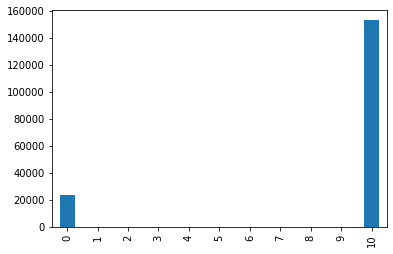

In [17]:
pred_10.MLX_sum.value_counts().reindex(range(11)).plot(kind = 'bar', logy = False);

In [18]:
pred_10_domains = pred_10.filter(like = 'domain')

In [19]:
pred_10_domains = pred_10_domains.fillna('NONE')

In [20]:
pred_10['unique_domains'] = pred_10_domains.apply(lambda x: np.unique(x, return_counts = True), axis = 1)

In [21]:
pred_10['len_unique_domains'] = pred_10.unique_domains.str[0].str.len()

In [22]:
pred_10['len_domain_mode_freq'] = pred_10.unique_domains.str[1].apply(max)

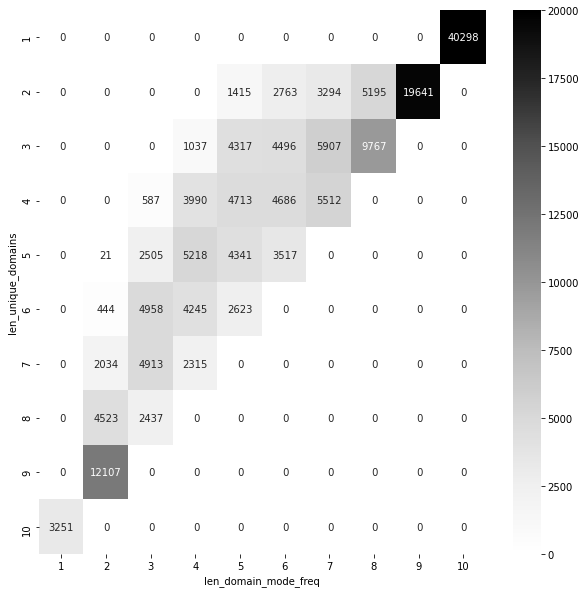

In [23]:
plt.figure(figsize = (10, 10))
sns.heatmap(pd.crosstab(index = pred_10.len_unique_domains, columns = pred_10.len_domain_mode_freq), cmap = 'Greys', vmax = 20000, annot = True, fmt = '2');